In [77]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set(style='whitegrid') 
%matplotlib inline


In [78]:
df = pd.read_csv("C:\\Users\\Acer\\OneDrive\\Desktop\\ML\\Projects\\AQI_AirQuality_EDA\\data\\delhi_aqi_2017_2023.csv") 
df.head()

,_id,January-2017,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,1,1,434.0,417.0,397.0,378.0,410.0,441.0,424.0,420.0,...,409.0,394.0,316.0,129.0,149.0,228.0,279.0,353.0,408.0,407
1,2,2,421.0,434.0,404.0,375.0,372.0,378.0,397.0,410.0,...,317.0,113.0,84.0,112.0,129.0,270.0,376.0,442.0,410.0,416
2,3,3,388.0,360.0,342.0,396.0,395.0,436.0,424.0,432.0,...,389.0,369.0,322.0,310.0,363.0,352.0,427.0,500.0,500.0,500
3,4,4,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,357.0,273.0,166.0,128.0,159.0,235.0,303.0,300.0,308.0,329
4,5,5,349.0,374.0,411.0,416.0,409.0,389.0,405.0,405.0,...,320.0,316.0,312.0,308.0,319.0,333.0,390.0,418.0,472.0,500


In [79]:
df.shape

(2677, 26)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2677 entries, 0 to 2676
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   _id           2677 non-null   int64 
 1   January-2017  2676 non-null   object
 2   00:00:00      2461 non-null   object
 3   01:00:00      2458 non-null   object
 4   02:00:00      2463 non-null   object
 5   03:00:00      2461 non-null   object
 6   04:00:00      2460 non-null   object
 7   05:00:00      2462 non-null   object
 8   06:00:00      2449 non-null   object
 9   07:00:00      2447 non-null   object
 10  08:00:00      2441 non-null   object
 11  09:00:00      2446 non-null   object
 12  10:00:00      2447 non-null   object
 13  11:00:00      2460 non-null   object
 14  12:00:00      2472 non-null   object
 15  13:00:00      2471 non-null   object
 16  14:00:00      2482 non-null   object
 17  15:00:00      2482 non-null   object
 18  16:00:00      2482 non-null   object
 19  17:00:

In [81]:
df.describe()

,_id
count,2677.000000
mean,1339.000000
std,772.927659
min,1.000000
25%,670.000000
50%,1339.000000
75%,2008.000000
max,2677.000000


In [82]:
df.columns

Index(['_id', 'January-2017', '00:00:00', '01:00:00', '02:00:00', '03:00:00',
       '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00',
       '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00',
       '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00',
       '22:00:00', '23:00:00'],
      dtype='object')

In [83]:
df.loc[-1] = [None] +['January-2017'] + [None]*(df.shape[1]-2) 
df.index = df.index+1 
df= df.sort_index() 
df

,_id,January-2017,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,None,January-2017,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,1,1,434.0,417.0,397.0,378.0,410.0,441.0,424.0,420.0,...,409.0,394.0,316.0,129.0,149.0,228.0,279.0,353.0,408.0,407
2,2,2,421.0,434.0,404.0,375.0,372.0,378.0,397.0,410.0,...,317.0,113.0,84.0,112.0,129.0,270.0,376.0,442.0,410.0,416
3,3,3,388.0,360.0,342.0,396.0,395.0,436.0,424.0,432.0,...,389.0,369.0,322.0,310.0,363.0,352.0,427.0,500.0,500.0,500
4,4,4,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,357.0,273.0,166.0,128.0,159.0,235.0,303.0,300.0,308.0,329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2673,2673,28,306.0,256.0,240.0,249.0,237.0,182.0,185.0,183.0,...,185,314,383,338.0,303.0,308.0,297.0,286.0,234.0,206.0
2674,2674,29,201.0,197.0,217.0,227.0,208.0,223.0,243.0,235.0,...,484,488,486,484.0,471.0,455.0,453.0,475.0,472.0,449.0
2675,2675,30,436.0,424.0,410.0,386.0,375.0,366.0,303.0,276.0,...,404,416,407,405.0,402.0,342.0,326.0,331.0,324.0,314.0
2676,2676,31,316.0,323.0,329.0,342.0,339.0,295.0,273.0,269.0,...,246,270,315,377.0,399.0,338.0,312.0,312.0,293.0,267.0


In [84]:
df['IsMonth'] = df['January-2017'].astype(str).str.contains(r"\d{4}" , na = False)
df

,_id,January-2017,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,IsMonth
0,None,January-2017,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,True
1,1,1,434.0,417.0,397.0,378.0,410.0,441.0,424.0,420.0,...,394.0,316.0,129.0,149.0,228.0,279.0,353.0,408.0,407,False
2,2,2,421.0,434.0,404.0,375.0,372.0,378.0,397.0,410.0,...,113.0,84.0,112.0,129.0,270.0,376.0,442.0,410.0,416,False
3,3,3,388.0,360.0,342.0,396.0,395.0,436.0,424.0,432.0,...,369.0,322.0,310.0,363.0,352.0,427.0,500.0,500.0,500,False
4,4,4,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,273.0,166.0,128.0,159.0,235.0,303.0,300.0,308.0,329,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2673,2673,28,306.0,256.0,240.0,249.0,237.0,182.0,185.0,183.0,...,314,383,338.0,303.0,308.0,297.0,286.0,234.0,206.0,False
2674,2674,29,201.0,197.0,217.0,227.0,208.0,223.0,243.0,235.0,...,488,486,484.0,471.0,455.0,453.0,475.0,472.0,449.0,False
2675,2675,30,436.0,424.0,410.0,386.0,375.0,366.0,303.0,276.0,...,416,407,405.0,402.0,342.0,326.0,331.0,324.0,314.0,False
2676,2676,31,316.0,323.0,329.0,342.0,339.0,295.0,273.0,269.0,...,270,315,377.0,399.0,338.0,312.0,312.0,293.0,267.0,False


In [85]:
df['Month'] = df['January-2017'].where(df['IsMonth']).ffill() 
df

,_id,January-2017,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,IsMonth,Month
0,None,January-2017,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,True,January-2017
1,1,1,434.0,417.0,397.0,378.0,410.0,441.0,424.0,420.0,...,316.0,129.0,149.0,228.0,279.0,353.0,408.0,407,False,January-2017
2,2,2,421.0,434.0,404.0,375.0,372.0,378.0,397.0,410.0,...,84.0,112.0,129.0,270.0,376.0,442.0,410.0,416,False,January-2017
3,3,3,388.0,360.0,342.0,396.0,395.0,436.0,424.0,432.0,...,322.0,310.0,363.0,352.0,427.0,500.0,500.0,500,False,January-2017
4,4,4,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,166.0,128.0,159.0,235.0,303.0,300.0,308.0,329,False,January-2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2673,2673,28,306.0,256.0,240.0,249.0,237.0,182.0,185.0,183.0,...,383,338.0,303.0,308.0,297.0,286.0,234.0,206.0,False,December-2023
2674,2674,29,201.0,197.0,217.0,227.0,208.0,223.0,243.0,235.0,...,486,484.0,471.0,455.0,453.0,475.0,472.0,449.0,False,December-2023
2675,2675,30,436.0,424.0,410.0,386.0,375.0,366.0,303.0,276.0,...,407,405.0,402.0,342.0,326.0,331.0,324.0,314.0,False,December-2023
2676,2676,31,316.0,323.0,329.0,342.0,339.0,295.0,273.0,269.0,...,315,377.0,399.0,338.0,312.0,312.0,293.0,267.0,False,December-2023


In [86]:
df_clean = df[~df['IsMonth']].copy() 
df_clean

,_id,January-2017,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,IsMonth,Month
1,1,1,434.0,417.0,397.0,378.0,410.0,441.0,424.0,420.0,...,316.0,129.0,149.0,228.0,279.0,353.0,408.0,407,False,January-2017
2,2,2,421.0,434.0,404.0,375.0,372.0,378.0,397.0,410.0,...,84.0,112.0,129.0,270.0,376.0,442.0,410.0,416,False,January-2017
3,3,3,388.0,360.0,342.0,396.0,395.0,436.0,424.0,432.0,...,322.0,310.0,363.0,352.0,427.0,500.0,500.0,500,False,January-2017
4,4,4,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,166.0,128.0,159.0,235.0,303.0,300.0,308.0,329,False,January-2017
5,5,5,349.0,374.0,411.0,416.0,409.0,389.0,405.0,405.0,...,312.0,308.0,319.0,333.0,390.0,418.0,472.0,500,False,January-2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2673,2673,28,306.0,256.0,240.0,249.0,237.0,182.0,185.0,183.0,...,383,338.0,303.0,308.0,297.0,286.0,234.0,206.0,False,December-2023
2674,2674,29,201.0,197.0,217.0,227.0,208.0,223.0,243.0,235.0,...,486,484.0,471.0,455.0,453.0,475.0,472.0,449.0,False,December-2023
2675,2675,30,436.0,424.0,410.0,386.0,375.0,366.0,303.0,276.0,...,407,405.0,402.0,342.0,326.0,331.0,324.0,314.0,False,December-2023
2676,2676,31,316.0,323.0,329.0,342.0,339.0,295.0,273.0,269.0,...,315,377.0,399.0,338.0,312.0,312.0,293.0,267.0,False,December-2023


In [87]:
df_clean.head()

,_id,January-2017,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,IsMonth,Month
1,1,1,434.0,417.0,397.0,378.0,410.0,441.0,424.0,420.0,...,316.0,129.0,149.0,228.0,279.0,353.0,408.0,407,False,January-2017
2,2,2,421.0,434.0,404.0,375.0,372.0,378.0,397.0,410.0,...,84.0,112.0,129.0,270.0,376.0,442.0,410.0,416,False,January-2017
3,3,3,388.0,360.0,342.0,396.0,395.0,436.0,424.0,432.0,...,322.0,310.0,363.0,352.0,427.0,500.0,500.0,500,False,January-2017
4,4,4,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,166.0,128.0,159.0,235.0,303.0,300.0,308.0,329,False,January-2017
5,5,5,349.0,374.0,411.0,416.0,409.0,389.0,405.0,405.0,...,312.0,308.0,319.0,333.0,390.0,418.0,472.0,500,False,January-2017


In [88]:
df_clean.rename(columns={'January-2017' : 'Day'} , inplace=True)
df_clean

,_id,Day,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,IsMonth,Month
1,1,1,434.0,417.0,397.0,378.0,410.0,441.0,424.0,420.0,...,316.0,129.0,149.0,228.0,279.0,353.0,408.0,407,False,January-2017
2,2,2,421.0,434.0,404.0,375.0,372.0,378.0,397.0,410.0,...,84.0,112.0,129.0,270.0,376.0,442.0,410.0,416,False,January-2017
3,3,3,388.0,360.0,342.0,396.0,395.0,436.0,424.0,432.0,...,322.0,310.0,363.0,352.0,427.0,500.0,500.0,500,False,January-2017
4,4,4,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,166.0,128.0,159.0,235.0,303.0,300.0,308.0,329,False,January-2017
5,5,5,349.0,374.0,411.0,416.0,409.0,389.0,405.0,405.0,...,312.0,308.0,319.0,333.0,390.0,418.0,472.0,500,False,January-2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2673,2673,28,306.0,256.0,240.0,249.0,237.0,182.0,185.0,183.0,...,383,338.0,303.0,308.0,297.0,286.0,234.0,206.0,False,December-2023
2674,2674,29,201.0,197.0,217.0,227.0,208.0,223.0,243.0,235.0,...,486,484.0,471.0,455.0,453.0,475.0,472.0,449.0,False,December-2023
2675,2675,30,436.0,424.0,410.0,386.0,375.0,366.0,303.0,276.0,...,407,405.0,402.0,342.0,326.0,331.0,324.0,314.0,False,December-2023
2676,2676,31,316.0,323.0,329.0,342.0,339.0,295.0,273.0,269.0,...,315,377.0,399.0,338.0,312.0,312.0,293.0,267.0,False,December-2023


In [89]:
df_clean.drop('_id' , axis=1 , inplace = True)  

df_clean.head()

,Day,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,IsMonth,Month
1,1,434.0,417.0,397.0,378.0,410.0,441.0,424.0,420.0,436.0,...,316.0,129.0,149.0,228.0,279.0,353.0,408.0,407,False,January-2017
2,2,421.0,434.0,404.0,375.0,372.0,378.0,397.0,410.0,431.0,...,84.0,112.0,129.0,270.0,376.0,442.0,410.0,416,False,January-2017
3,3,388.0,360.0,342.0,396.0,395.0,436.0,424.0,432.0,358.0,...,322.0,310.0,363.0,352.0,427.0,500.0,500.0,500,False,January-2017
4,4,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,166.0,128.0,159.0,235.0,303.0,300.0,308.0,329,False,January-2017
5,5,349.0,374.0,411.0,416.0,409.0,389.0,405.0,405.0,371.0,...,312.0,308.0,319.0,333.0,390.0,418.0,472.0,500,False,January-2017


In [90]:
df_clean.drop('IsMonth' , axis = 1 , inplace=True) 

In [91]:
df_clean

,Day,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Month
1,1,434.0,417.0,397.0,378.0,410.0,441.0,424.0,420.0,436.0,...,394.0,316.0,129.0,149.0,228.0,279.0,353.0,408.0,407,January-2017
2,2,421.0,434.0,404.0,375.0,372.0,378.0,397.0,410.0,431.0,...,113.0,84.0,112.0,129.0,270.0,376.0,442.0,410.0,416,January-2017
3,3,388.0,360.0,342.0,396.0,395.0,436.0,424.0,432.0,358.0,...,369.0,322.0,310.0,363.0,352.0,427.0,500.0,500.0,500,January-2017
4,4,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,273.0,166.0,128.0,159.0,235.0,303.0,300.0,308.0,329,January-2017
5,5,349.0,374.0,411.0,416.0,409.0,389.0,405.0,405.0,371.0,...,316.0,312.0,308.0,319.0,333.0,390.0,418.0,472.0,500,January-2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2673,28,306.0,256.0,240.0,249.0,237.0,182.0,185.0,183.0,169.0,...,314,383,338.0,303.0,308.0,297.0,286.0,234.0,206.0,December-2023
2674,29,201.0,197.0,217.0,227.0,208.0,223.0,243.0,235.0,239.0,...,488,486,484.0,471.0,455.0,453.0,475.0,472.0,449.0,December-2023
2675,30,436.0,424.0,410.0,386.0,375.0,366.0,303.0,276.0,288.0,...,416,407,405.0,402.0,342.0,326.0,331.0,324.0,314.0,December-2023
2676,31,316.0,323.0,329.0,342.0,339.0,295.0,273.0,269.0,259.0,...,270,315,377.0,399.0,338.0,312.0,312.0,293.0,267.0,December-2023


In [92]:
cols = df_clean.columns.tolist()
cols.remove('Month')  
cols

['Day',
 '00:00:00',
 '01:00:00',
 '02:00:00',
 '03:00:00',
 '04:00:00',
 '05:00:00',
 '06:00:00',
 '07:00:00',
 '08:00:00',
 '09:00:00',
 '10:00:00',
 '11:00:00',
 '12:00:00',
 '13:00:00',
 '14:00:00',
 '15:00:00',
 '16:00:00',
 '17:00:00',
 '18:00:00',
 '19:00:00',
 '20:00:00',
 '21:00:00',
 '22:00:00',
 '23:00:00']

In [93]:
cols.insert(cols.index('Day') , 'Month') 
cols

['Month',
 'Day',
 '00:00:00',
 '01:00:00',
 '02:00:00',
 '03:00:00',
 '04:00:00',
 '05:00:00',
 '06:00:00',
 '07:00:00',
 '08:00:00',
 '09:00:00',
 '10:00:00',
 '11:00:00',
 '12:00:00',
 '13:00:00',
 '14:00:00',
 '15:00:00',
 '16:00:00',
 '17:00:00',
 '18:00:00',
 '19:00:00',
 '20:00:00',
 '21:00:00',
 '22:00:00',
 '23:00:00']

In [94]:
df_clean = df_clean[cols]

In [95]:
df_clean

,Month,Day,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
1,January-2017,1,434.0,417.0,397.0,378.0,410.0,441.0,424.0,420.0,...,409.0,394.0,316.0,129.0,149.0,228.0,279.0,353.0,408.0,407
2,January-2017,2,421.0,434.0,404.0,375.0,372.0,378.0,397.0,410.0,...,317.0,113.0,84.0,112.0,129.0,270.0,376.0,442.0,410.0,416
3,January-2017,3,388.0,360.0,342.0,396.0,395.0,436.0,424.0,432.0,...,389.0,369.0,322.0,310.0,363.0,352.0,427.0,500.0,500.0,500
4,January-2017,4,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,357.0,273.0,166.0,128.0,159.0,235.0,303.0,300.0,308.0,329
5,January-2017,5,349.0,374.0,411.0,416.0,409.0,389.0,405.0,405.0,...,320.0,316.0,312.0,308.0,319.0,333.0,390.0,418.0,472.0,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2673,December-2023,28,306.0,256.0,240.0,249.0,237.0,182.0,185.0,183.0,...,185,314,383,338.0,303.0,308.0,297.0,286.0,234.0,206.0
2674,December-2023,29,201.0,197.0,217.0,227.0,208.0,223.0,243.0,235.0,...,484,488,486,484.0,471.0,455.0,453.0,475.0,472.0,449.0
2675,December-2023,30,436.0,424.0,410.0,386.0,375.0,366.0,303.0,276.0,...,404,416,407,405.0,402.0,342.0,326.0,331.0,324.0,314.0
2676,December-2023,31,316.0,323.0,329.0,342.0,339.0,295.0,273.0,269.0,...,246,270,315,377.0,399.0,338.0,312.0,312.0,293.0,267.0


In [96]:
df_clean['Day'] = pd.to_numeric(df_clean['Day'] , errors = 'coerce').astype('Int64')

In [97]:
df_clean['Date'] = df_clean['Month'].astype(str) + '-' + df_clean['Day'].astype(str) 
df_clean.head()

,Month,Day,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Date
1,January-2017,1,434.0,417.0,397.0,378.0,410.0,441.0,424.0,420.0,...,394.0,316.0,129.0,149.0,228.0,279.0,353.0,408.0,407,January-2017-1
2,January-2017,2,421.0,434.0,404.0,375.0,372.0,378.0,397.0,410.0,...,113.0,84.0,112.0,129.0,270.0,376.0,442.0,410.0,416,January-2017-2
3,January-2017,3,388.0,360.0,342.0,396.0,395.0,436.0,424.0,432.0,...,369.0,322.0,310.0,363.0,352.0,427.0,500.0,500.0,500,January-2017-3
4,January-2017,4,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,273.0,166.0,128.0,159.0,235.0,303.0,300.0,308.0,329,January-2017-4
5,January-2017,5,349.0,374.0,411.0,416.0,409.0,389.0,405.0,405.0,...,316.0,312.0,308.0,319.0,333.0,390.0,418.0,472.0,500,January-2017-5


In [98]:
df_clean['Date'] = pd.to_datetime(df_clean['Date'] , format = '%B-%Y-%d' , errors = 'coerce') 
 

df_clean.head()

,Month,Day,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Date
1,January-2017,1,434.0,417.0,397.0,378.0,410.0,441.0,424.0,420.0,...,394.0,316.0,129.0,149.0,228.0,279.0,353.0,408.0,407,2017-01-01
2,January-2017,2,421.0,434.0,404.0,375.0,372.0,378.0,397.0,410.0,...,113.0,84.0,112.0,129.0,270.0,376.0,442.0,410.0,416,2017-01-02
3,January-2017,3,388.0,360.0,342.0,396.0,395.0,436.0,424.0,432.0,...,369.0,322.0,310.0,363.0,352.0,427.0,500.0,500.0,500,2017-01-03
4,January-2017,4,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,273.0,166.0,128.0,159.0,235.0,303.0,300.0,308.0,329,2017-01-04
5,January-2017,5,349.0,374.0,411.0,416.0,409.0,389.0,405.0,405.0,...,316.0,312.0,308.0,319.0,333.0,390.0,418.0,472.0,500,2017-01-05


In [99]:
df_clean.drop('Day' , axis = 1 , inplace = True)

In [100]:
df_clean.head()

,Month,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,Date
1,January-2017,434.0,417.0,397.0,378.0,410.0,441.0,424.0,420.0,436.0,...,394.0,316.0,129.0,149.0,228.0,279.0,353.0,408.0,407,2017-01-01
2,January-2017,421.0,434.0,404.0,375.0,372.0,378.0,397.0,410.0,431.0,...,113.0,84.0,112.0,129.0,270.0,376.0,442.0,410.0,416,2017-01-02
3,January-2017,388.0,360.0,342.0,396.0,395.0,436.0,424.0,432.0,358.0,...,369.0,322.0,310.0,363.0,352.0,427.0,500.0,500.0,500,2017-01-03
4,January-2017,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,273.0,166.0,128.0,159.0,235.0,303.0,300.0,308.0,329,2017-01-04
5,January-2017,349.0,374.0,411.0,416.0,409.0,389.0,405.0,405.0,371.0,...,316.0,312.0,308.0,319.0,333.0,390.0,418.0,472.0,500,2017-01-05


In [101]:
cols = df_clean.columns.tolist()  

cols.remove('Date') 
cols.insert(cols.index('Month') , 'Date') 

df_clean = df_clean[cols]  

df_clean.head()

,Date,Month,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
1,2017-01-01,January-2017,434.0,417.0,397.0,378.0,410.0,441.0,424.0,420.0,...,409.0,394.0,316.0,129.0,149.0,228.0,279.0,353.0,408.0,407
2,2017-01-02,January-2017,421.0,434.0,404.0,375.0,372.0,378.0,397.0,410.0,...,317.0,113.0,84.0,112.0,129.0,270.0,376.0,442.0,410.0,416
3,2017-01-03,January-2017,388.0,360.0,342.0,396.0,395.0,436.0,424.0,432.0,...,389.0,369.0,322.0,310.0,363.0,352.0,427.0,500.0,500.0,500
4,2017-01-04,January-2017,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,357.0,273.0,166.0,128.0,159.0,235.0,303.0,300.0,308.0,329
5,2017-01-05,January-2017,349.0,374.0,411.0,416.0,409.0,389.0,405.0,405.0,...,320.0,316.0,312.0,308.0,319.0,333.0,390.0,418.0,472.0,500


In [102]:
df_melted = df_clean.melt(
          id_vars= ['Date' , 'Month'],
          var_name= 'Hour',
          value_name= 'AQI'
)

df_melted.head()

,Date,Month,Hour,AQI
0,2017-01-01,January-2017,00:00:00,434.0
1,2017-01-02,January-2017,00:00:00,421.0
2,2017-01-03,January-2017,00:00:00,388.0
3,2017-01-04,January-2017,00:00:00,500.0
4,2017-01-05,January-2017,00:00:00,349.0


In [103]:
df_melted['Date'].astype(str) + " " + df_melted['Hour']

0        2017-01-01 00:00:00
1        2017-01-02 00:00:00
2        2017-01-03 00:00:00
3        2017-01-04 00:00:00
4        2017-01-05 00:00:00
                ...         
62251    2023-12-28 23:00:00
62252    2023-12-29 23:00:00
62253    2023-12-30 23:00:00
62254    2023-12-31 23:00:00
62255           NaT 23:00:00
Length: 62256, dtype: object

In [104]:
df_melted['Hour'].unique()

array(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
       '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00',
       '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00',
       '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00',
       '20:00:00', '21:00:00', '22:00:00', '23:00:00'], dtype=object)

In [105]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62256 entries, 0 to 62255
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    60072 non-null  datetime64[ns]
 1   Month   62256 non-null  object        
 2   Hour    62256 non-null  object        
 3   AQI     57138 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.9+ MB


In [106]:
df_melted['Hour'].apply(type).value_counts()

Hour
<class 'str'>    62256
Name: count, dtype: int64

In [109]:
df_melted['Hour'] = pd.to_timedelta(df_melted['Hour'])

df_melted['Timestamp'] = df_melted['Date'] + df_melted['Hour']
  
df_melted['Hour'].apply(type).value_counts()

Hour
<class 'pandas._libs.tslibs.timedeltas.Timedelta'>    62256
Name: count, dtype: int64

In [108]:
df_melted[['Date', 'Hour', 'Timestamp']].sample(5)

,Date,Hour,Timestamp
61393,2021-09-20,0 days 23:00:00,2021-09-20 23:00:00
4976,2023-06-10,0 days 01:00:00,2023-06-10 01:00:00
23810,2018-05-15,0 days 09:00:00,2018-05-15 09:00:00
29978,2020-12-17,0 days 11:00:00,2020-12-17 11:00:00
16878,2020-08-13,0 days 06:00:00,2020-08-13 06:00:00


In [110]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62256 entries, 0 to 62255
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   Date       60072 non-null  datetime64[ns] 
 1   Month      62256 non-null  object         
 2   Hour       62256 non-null  timedelta64[ns]
 3   AQI        57138 non-null  object         
 4   Timestamp  60072 non-null  datetime64[ns] 
dtypes: datetime64[ns](2), object(2), timedelta64[ns](1)
memory usage: 2.4+ MB


In [111]:
df_melted['AQI'].unique()

array(['434.0', '421.0', '388.0', '500.0', '349.0', '362.0', '338.0',
       '232.0', '411.0', '497.0', '487.0', '410.0', '309.0', '361.0',
       '416.0', '262.0', '383.0', '436.0', '379.0', '345.0', '408.0',
       '386.0', '92.0', '322.0', '335.0', nan, '413.0', '383', '442',
       '378', '426', '346', '439', '187', '325', '331', '371', '367',
       '319', '316', '441', '453', '429', '288', '379', '345', '350',
       '412', '302', '178', '136', '250', '268', '321', '322', '346.0',
       '320.0', '132.0', '314.0', '364.0', '336.0', '281.0', '339.0',
       '148.0', '43.0', '85.0', '293.0', '178.0', '173.0', '118.0',
       '315.0', '423.0', '341.0', '306.0', '285.0', '240.0', '297.0',
       '246.0', '289.0', '72.0', '52.0', '348.0', '128.0', '58.0',
       '312.0', '181.0', '134.0', '354.0', '319.0', '359.0', '321.0',
       '182.0', '317.0', '218.0', '324.0', '168.0', '77.0', '352.0',
       '194.0', '95.0', '233.0', '291.0', '159.0', '374.0', '135.0',
       '340.0', '318.0', 

In [113]:
df_melted['AQI'].apply(type).value_counts()

AQI
<class 'str'>      57138
<class 'float'>     5118
Name: count, dtype: int64

In [116]:
df_melted['AQI'] = pd.to_numeric(df_melted['AQI'] , errors='coerce')

print(df_melted['AQI'].dtype)
print(df_melted['AQI'].isna().sum())

float64
5118


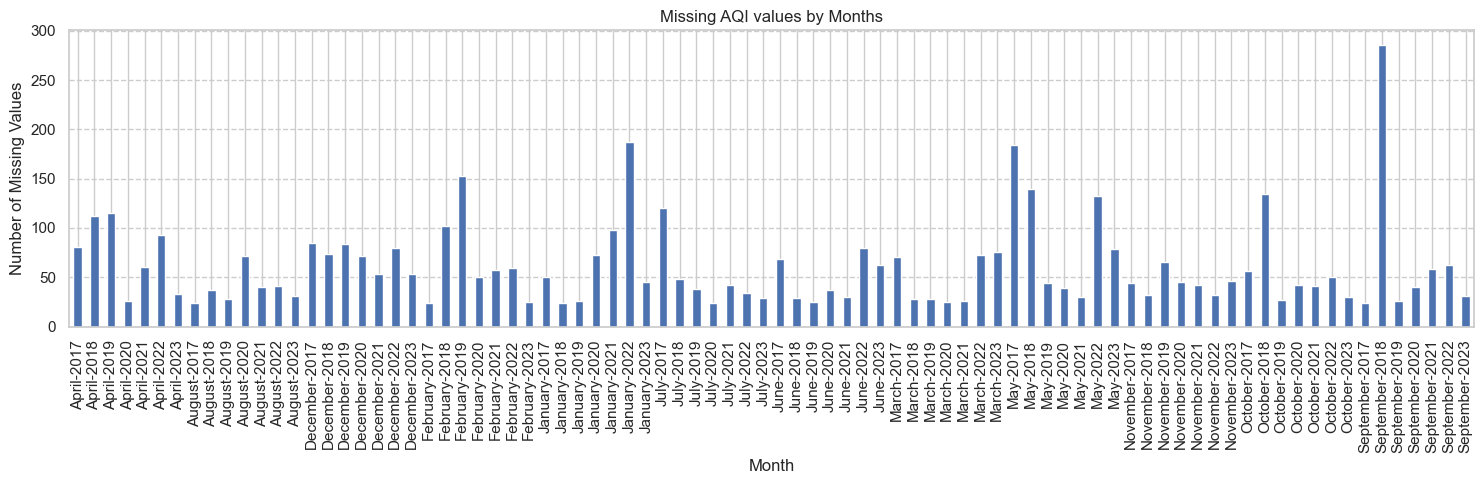

In [124]:
missing_by_month = df_melted[df_melted['AQI'].isna()].groupby('Month').size()  

missing_by_month.plot(kind='bar' , figsize=(15,5) , title='Missing AQI values by Months')
plt.xlabel('Month') 
plt.ylabel('Number of Missing Values') 
plt.xticks(rotation = 90)
plt.grid(axis='y' , linestyle= '--' , alpha = 1.0) 
plt.tight_layout() 
plt.show()

In [121]:
df.columns

Index(['_id', 'January-2017', '00:00:00', '01:00:00', '02:00:00', '03:00:00',
       '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00',
       '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00',
       '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00',
       '22:00:00', '23:00:00', 'IsMonth', 'Month'],
      dtype='object')